In [38]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import KDTree

In [39]:
# 读取数据
data = pd.read_csv(r'D:\ArcGISProjects\workspace\duyun\result_table\feature_dy.csv')

In [45]:
data = data[['LON','LAT','pH']]
data

,LON,LAT,pH
0,477615.0,2912145.0,7.00
1,477545.0,2912550.0,6.26
2,477515.0,2911055.0,5.00
3,477550.0,2903650.0,4.56
4,476955.0,2903835.0,5.26
...,...,...,...
6493,474855.0,2877650.0,4.28
6494,474365.0,2877410.0,5.22
6495,475230.0,2896000.0,4.64
6496,475320.0,2895595.0,4.72


In [55]:

points = data[['LON','LAT']].values
ph_values = data['pH'].values

In [56]:
# 构建KD树以便快速计算距离
tree = KDTree(points)

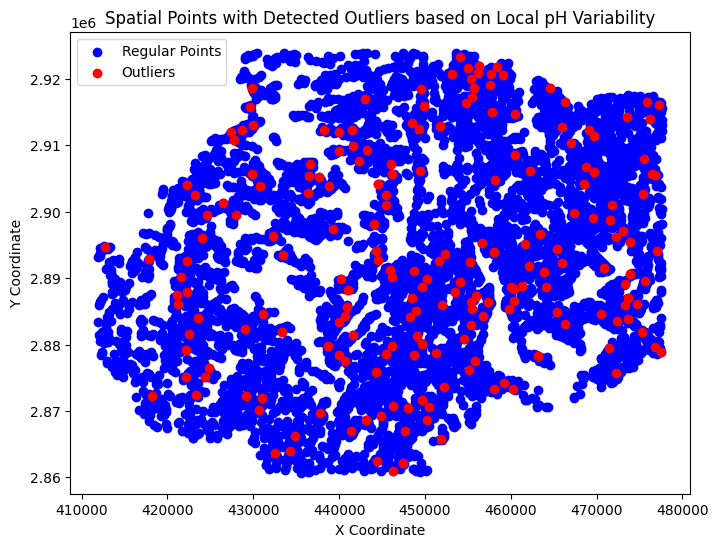

In [66]:



# 指定范围的阈值（例如，0.1代表10%的归一化距离）
distance_threshold = 1000

# 识别异常值
outliers = []
for i in range(len(points)):
    # 找到在距离阈值内的所有点
    indices = tree.query_ball_point(points[i], distance_threshold)

    # 计算这些点的pH值的均值和标准差
    if len(indices) > 1:  # 避免只有单个点的情况
        local_ph_values = ph_values[indices]
        mean_ph = np.mean(local_ph_values)
        std_ph = np.std(local_ph_values)

        # 判断当前点的pH值是否是离群值（例如超过均值2个标准差）
        if abs(ph_values[i] - mean_ph) > 2 * std_ph:
            outliers.append(int(i))  # 确保添加的是整数类型

outliers = np.unique(outliers)

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Regular Points')
plt.scatter(points[outliers, 0], points[outliers, 1], color='red', label='Outliers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Spatial Points with Detected Outliers based on Local pH Variability')
plt.legend()
plt.show()


In [72]:
data.iloc[18]

LON     476980.00
LAT    2894030.00
pH           6.75
Name: 18, dtype: float64

In [67]:
outliers,len(outliers)

(array([  18,   69,   82,   97,  110,  142,  149,  155,  164,  174,  175,
         179,  187,  218,  240,  262,  331,  411,  430,  437,  456,  498,
         505,  530,  635,  654,  691,  701,  739,  760,  763,  788,  946,
         953,  963,  974,  997, 1022, 1034, 1106, 1121, 1139, 1217, 1310,
        1436, 1488, 1516, 1552, 1623, 1791, 1824, 1878, 1888, 1975, 1998,
        2001, 2103, 2128, 2132, 2141, 2168, 2194, 2233, 2236, 2271, 2312,
        2354, 2407, 2428, 2438, 2457, 2492, 2547, 2616, 2628, 2648, 2655,
        2677, 2727, 2740, 2750, 2805, 2821, 2832, 2834, 2847, 2876, 2894,
        2954, 2967, 2984, 3001, 3004, 3008, 3060, 3065, 3088, 3100, 3122,
        3142, 3175, 3207, 3210, 3229, 3248, 3305, 3341, 3389, 3425, 3439,
        3449, 3451, 3474, 3501, 3517, 3527, 3607, 3610, 3626, 3670, 3679,
        3715, 3716, 3722, 3781, 3801, 3823, 3876, 3888, 3894, 3915, 3961,
        4022, 4081, 4097, 4178, 4199, 4251, 4280, 4293, 4316, 4344, 4398,
        4417, 4447, 4489, 4511, 4537, 

TypeError: 'NoneType' object is not callable